In [1]:
import pandas as pd
import numpy as np
import sklearn as skl

In [2]:
data=pd.read_csv("dataset\Clean_data.csv")

In [3]:
data.head(10)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.00000,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018.00000,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,906.83813,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862.00000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446.00000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11
5,39493,891.00000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,Left wheel,White,4,9
6,1803,761.00000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,15
7,549,751.00000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,Left wheel,Grey,12,12
8,1098,394.00000,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,Left wheel,Black,12,11
9,26657,906.83813,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,Left wheel,Silver,12,18


In [4]:
data.tail(10)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
19227,29793,1053.00000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,Left wheel,Black,12,11
19228,706,1850.00000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,Left wheel,Black,12,17
19229,50,906.83813,TOYOTA,Prius,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,Left wheel,Silver,6,17
19230,470,645.00000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,Left wheel,Silver,12,14
19231,5802,1055.00000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,Left wheel,Grey,12,12
19232,8467,906.83813,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,Silver,5,26
19233,15681,831.00000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8,14
19234,26108,836.00000,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4,15
19235,5331,1288.00000,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,Black,4,18
19236,470,753.00000,HYUNDAI,Sonata,Sedan,Yes,Hybrid,2.4,186923,4.0,Automatic,Front,Left wheel,White,12,13


In [8]:
a = np.sort(data["Age"].unique())
a

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 57, 60, 61, 68, 72,
       78, 82, 86])

Let's create a new column "Age_category" that will help us split the data in train and test set

In [10]:
edges=[5.0, 10.0, 12.0, 14.0, 17.0, 86.0]
labels=[1, 2, 3, 4, 5]
data['Age_category'] = pd.cut(data['Age'], bins=edges, labels=labels, include_lowest=True, right=True)
data.head(10)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age,Age_category
0,13328,1399.00000,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15,4
1,16621,1018.00000,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14,3
2,8467,906.83813,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19,5
3,3607,862.00000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14,3
4,11726,446.00000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11,2
5,39493,891.00000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,Left wheel,White,4,9,1
6,1803,761.00000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,15,4
7,549,751.00000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,Left wheel,Grey,12,12,2
8,1098,394.00000,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,Left wheel,Black,12,11,2
9,26657,906.83813,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,Left wheel,Silver,12,18,5


Text(0, 0.5, 'Number of Instances')

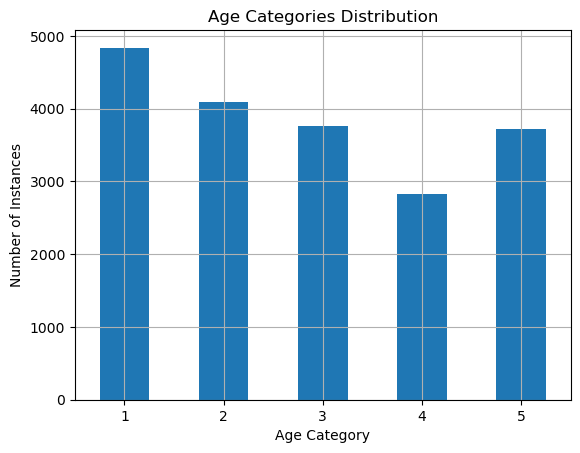

In [13]:
import matplotlib.pyplot as plt
data["Age_category"].value_counts().sort_index().plot.bar(rot=0, grid=True)  
plt.title("Age Categories Distribution") 
plt.xlabel("Age Category")
plt.ylabel("Number of Instances")

Let's split the dataset

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified split (80/20)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["Age_category"]):
    strat_train_set = data.loc[train_index].reset_index(drop=True)
    strat_test_set = data.loc[test_index].reset_index(drop=True)


Save the training and testing dataset

In [15]:
strat_test_set.to_csv("dataset/Test_Set.csv")

In [16]:
strat_train_set.to_csv("dataset/Training_Set.csv")